<a href="https://colab.research.google.com/github/jnmelo13/Ciencia-de-dados/blob/main/big_mart_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando Bibliotecas

In [1]:
#Fazendo a importação dos pacotes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, roc_curve
import warnings
from sklearn import metrics
warnings.filterwarnings("ignore")

In [2]:
!pip install scikit-learn
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.impute import KNNImputer

In [4]:
import datetime

In [5]:
!pip install -q xgboost

In [6]:
import xgboost as xgb
from xgboost import XGBRegressor

#Carregando Dados

In [7]:
df_test = pd.read_csv('/content/test.csv')
df_train = pd.read_csv('/content/train.csv')
#Concatenando dataframes
df_comp = pd.concat([df_test,df_train],axis = 0)

In [8]:
df_train.shape

(8523, 12)

In [9]:
df_comp.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [10]:
df_comp.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


In [11]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [12]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#Estudando Valores Ausentes

In [13]:
#Verificando valores ausentes
valores_ausentes = df_train.isnull().sum().sort_values(ascending = False)
valores_ausentes[valores_ausentes>0]

Outlet_Size    2410
Item_Weight    1463
dtype: int64

Observação:


*   Apenas Outlet_Size e Item_Weight apresentam Valores ausentes



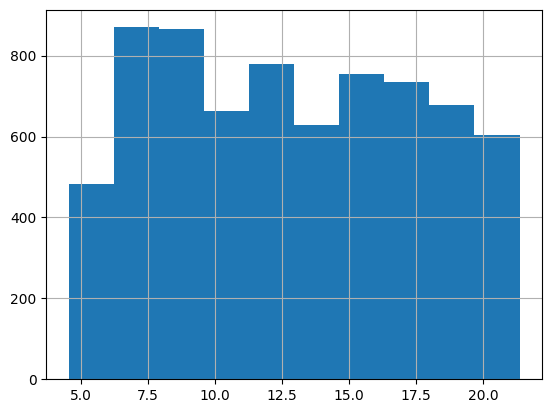

In [14]:
#Verificando frequência dos pesos
df_train.Item_Weight.hist();

In [15]:
mediana = df_train['Item_Weight'].median()
media = df_train['Item_Weight'].mean()

print(f'O Valor da mediana é: {mediana} e o valor da média é: {media}')

O Valor da mediana é: 12.6 e o valor da média é: 12.857645184135976


**Observação:**
Como não foram vistos outliers significativos na coluna 'Item_Weight', vamos substituir os valores ausentes pela mediana

In [16]:
#Como não foram vistos outliers significativos na coluna 'Item_Weight', vamos substituir os valores ausentes pela mediana
df_train.loc[df_train[df_train['Item_Weight'].isnull()].index,'Item_Weight'] = mediana

In [17]:
#Verificando dataset de teste
ausentes_df_teste = df_test.isnull().sum().sort_values(ascending = False)
ausentes_df_teste[ausentes_df_teste>0]

Outlet_Size    1606
Item_Weight     976
dtype: int64

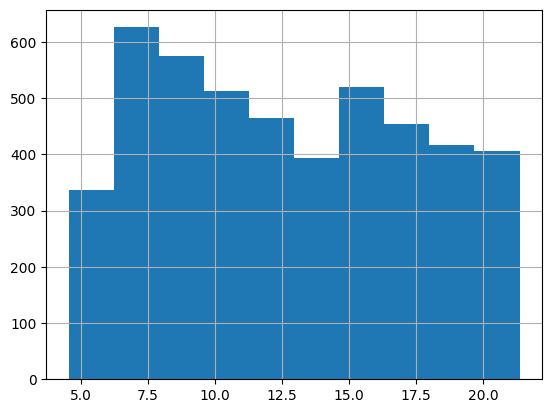

In [18]:
#Verificando frequência dos pesos
df_test.Item_Weight.hist();

In [19]:
#Como não foram vistos outliers significativos na coluna 'Item_Weight', vamos substituir os valores ausentes pela mediana
df_test.loc[df_test[df_test['Item_Weight'].isnull()].index,'Item_Weight'] = mediana

In [20]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [21]:
# Preencher valores nulos da coluna categórica com a moda
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0], inplace=True)

In [22]:
#Fazendo o mesmo para o dataset de teste
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0], inplace=True)

In [23]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [24]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

#Estudando Outliers

In [25]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [26]:
df_train.select_dtypes(include=['number']).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

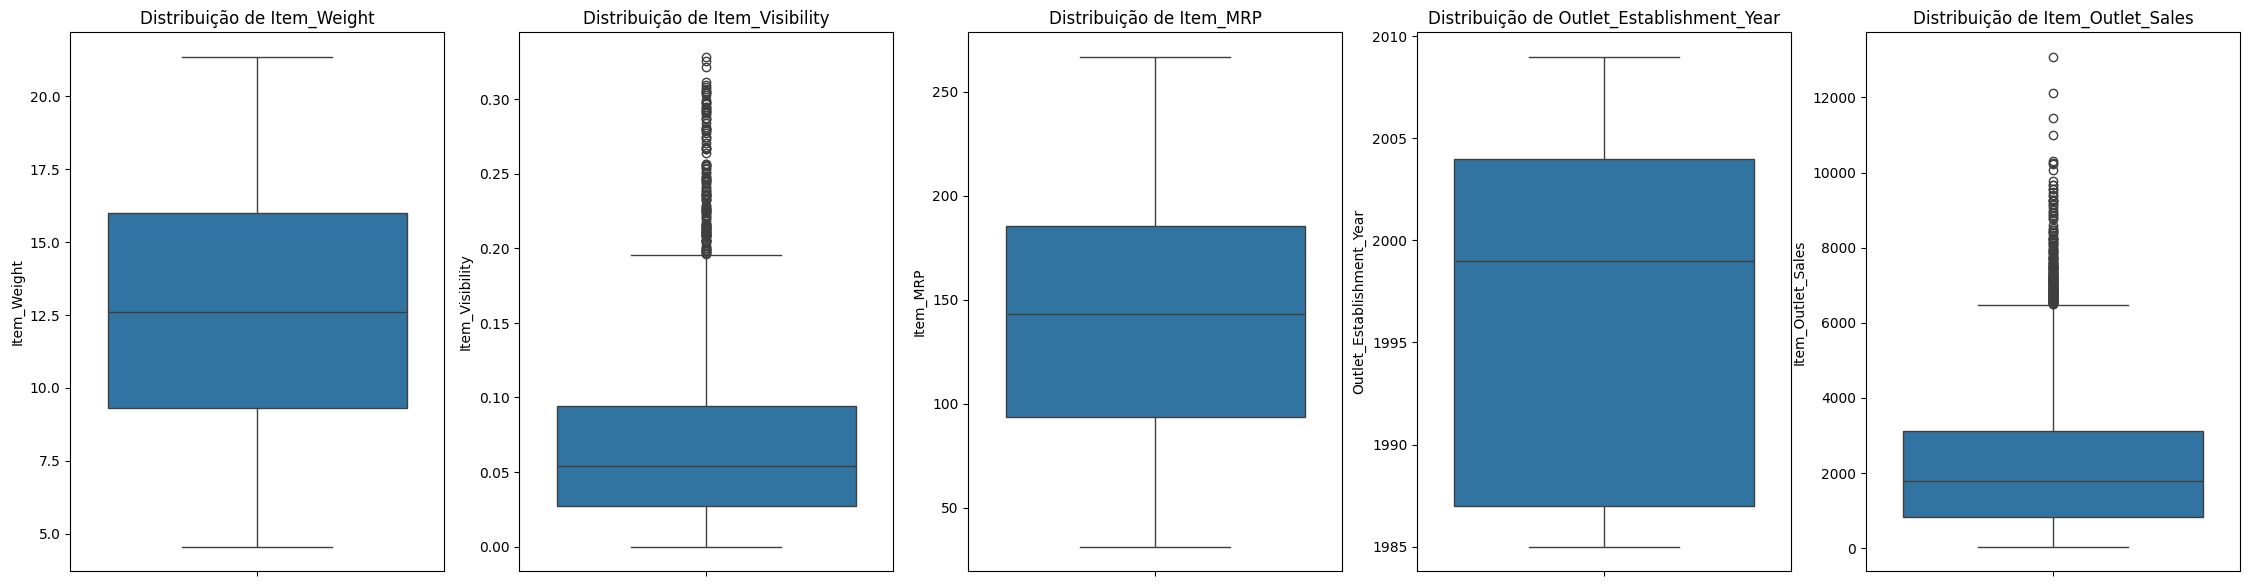

In [27]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(28,7));
for index,col in enumerate(df_train.select_dtypes(include=['number']).columns):
  sns.boxplot(data=df_train, y=col, ax = ax[index])
  ax[index].set_title(f'Distribuição de {col}')

**Observação:**

*   Únicas variáveis que apresentam outliers são Item_Visibility e Item_Outlet_Sales, que serão removidos ao longo do projeto



#Análise Exploratória

In [28]:
#Criando dicionário de dados

In [29]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


##Variáveis Numéricas

In [30]:
df_train.select_dtypes(include=['number']).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [31]:
df_train.select_dtypes(include=['number']).describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [32]:
colunas_numericas = df_train.select_dtypes(include=['number']).columns
df_train_numericas = df_train[colunas_numericas]

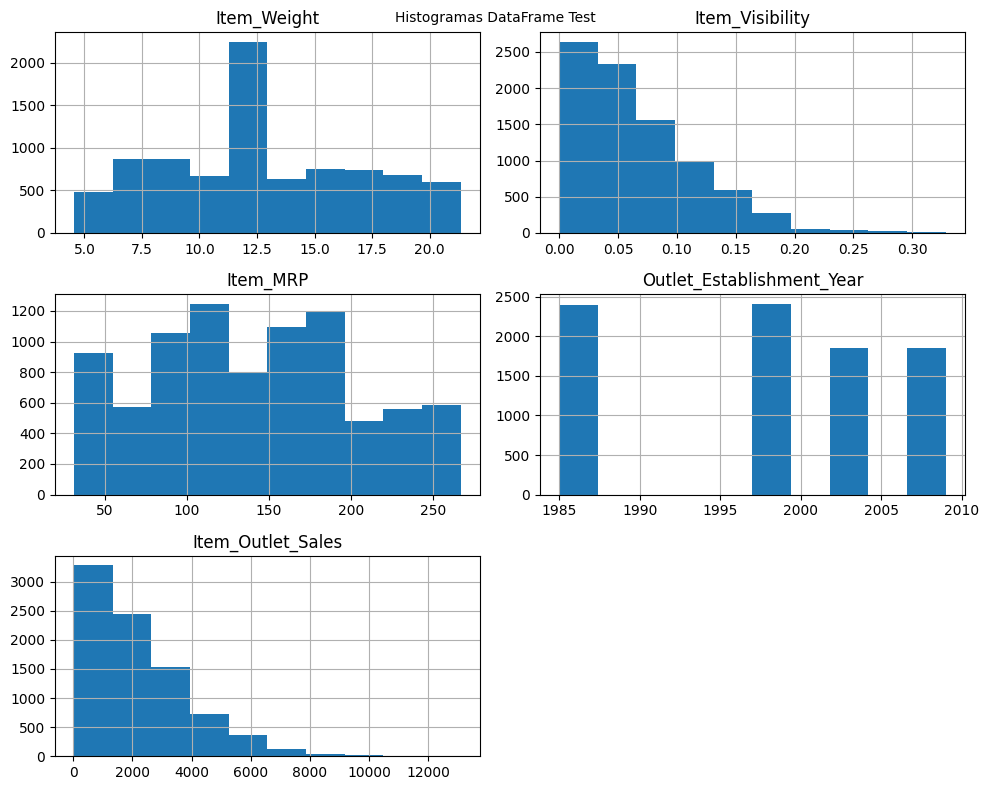

In [33]:
df_train_numericas.hist(figsize=(10, 8))
plt.tight_layout()
plt.suptitle('Histogramas DataFrame Test', fontsize=10)
plt.show()

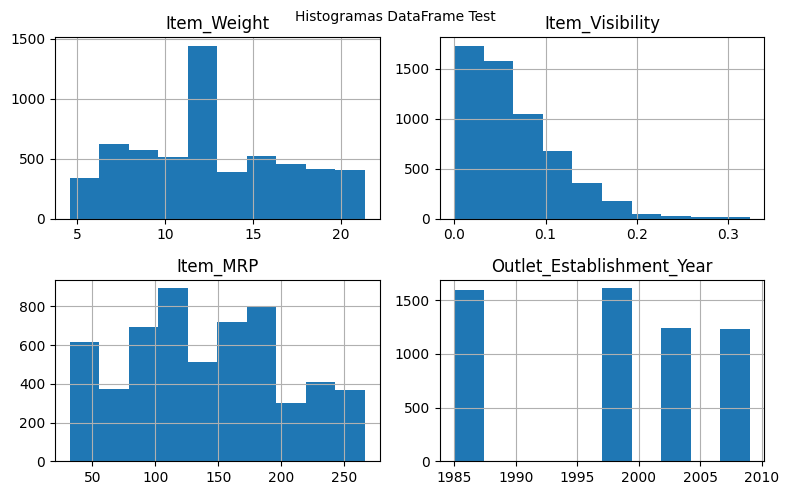

In [34]:
colunas_numericas_test = ['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year']
df_test_numericas = df_test[colunas_numericas_test]
df_test_numericas.hist(figsize=(8, 5))
plt.tight_layout()
plt.suptitle('Histogramas DataFrame Test', fontsize=10)
plt.show()

In [35]:
#Exibindo correlação com variável alvo
corr_matrix = df_train.corr(numeric_only=True)
corr_matrix[((corr_matrix["Item_Outlet_Sales"]>0.1) | (corr_matrix["Item_Outlet_Sales"]<-0.1))]["Item_Outlet_Sales"]

Item_Visibility     -0.128625
Item_MRP             0.567574
Item_Outlet_Sales    1.000000
Name: Item_Outlet_Sales, dtype: float64

<Axes: >

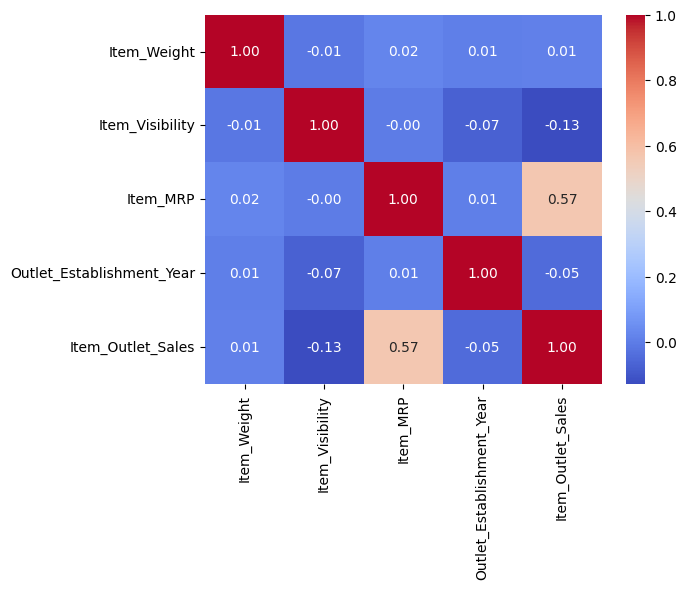

In [36]:
# Exibindo mapa de calor para a correlação
sns.heatmap(df_train[df_train.select_dtypes(include=['number']).columns].corr(), cmap='coolwarm',annot= True, fmt = '.2f')

##Variáveis Categóricas

In [37]:
#Verificando quantidade de itens diferentes
len(np.unique(df_train['Item_Identifier']))

1559

In [38]:
df_train.select_dtypes(include=['object']).columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [39]:
#Montando lissta sem a coluna Item_Identifier devido a quantidade diferente de valores
colunas_categoricas_montar_grafico = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

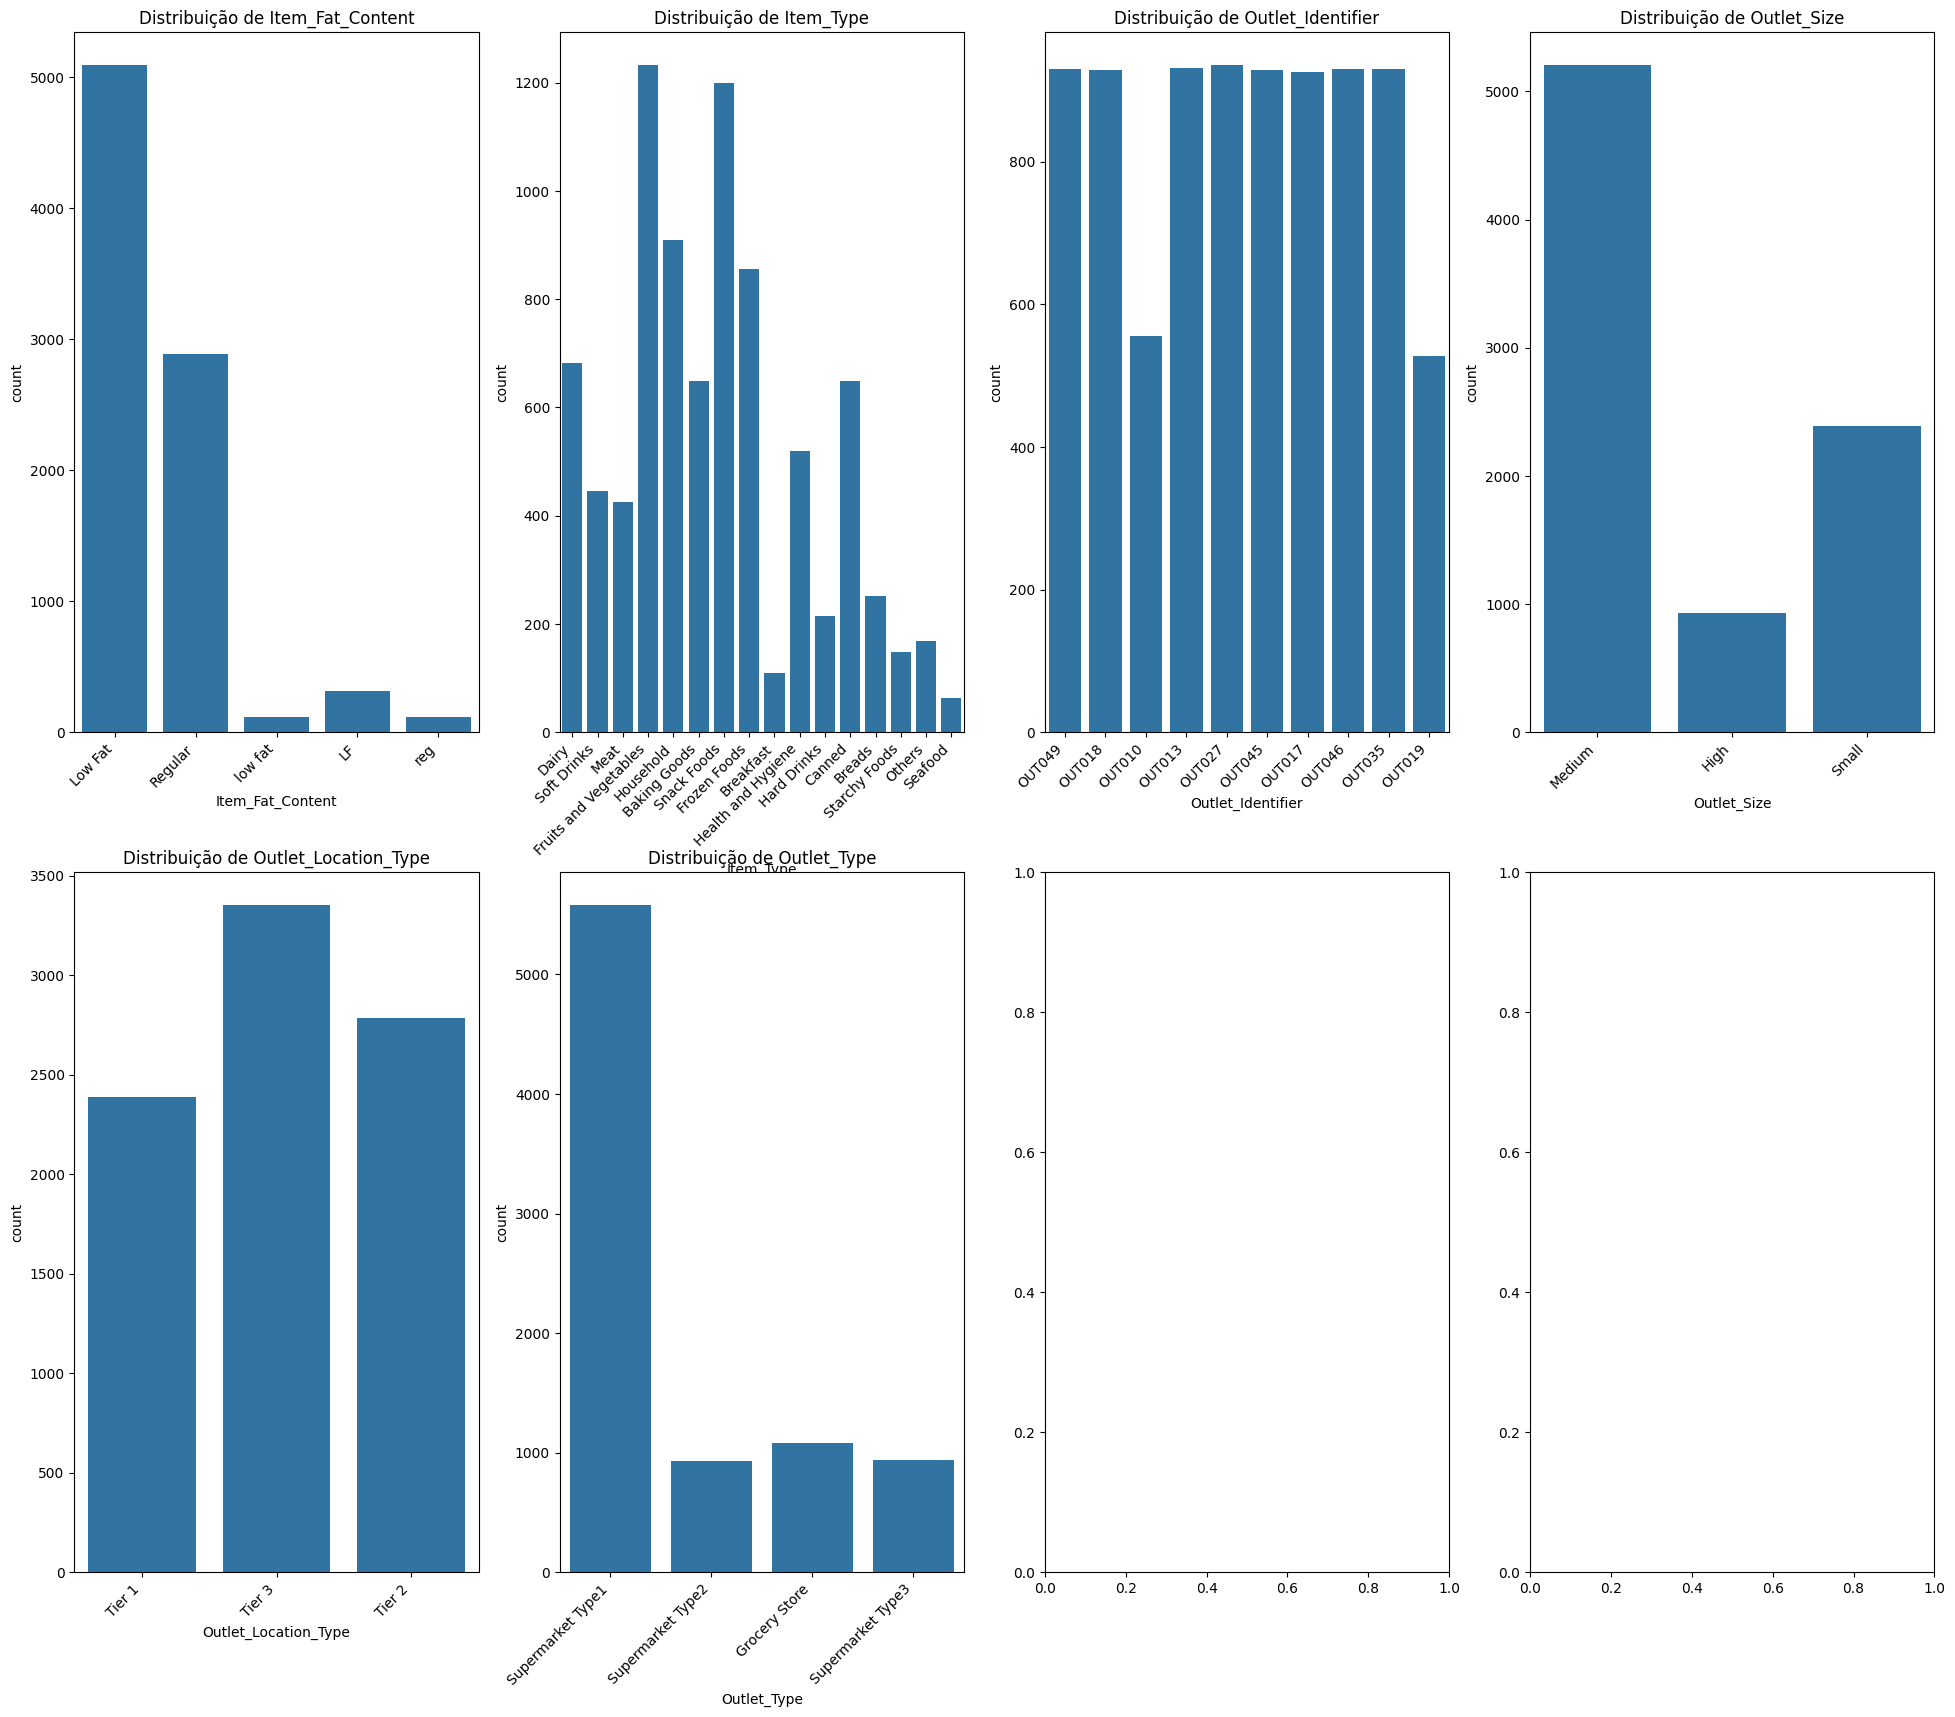

In [40]:
_, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (24,20))
i=0
cont = 0
while i < 2:
  j=0
  while j<4 and cont<6:
    col = colunas_categoricas_montar_grafico[cont]
    sns.countplot(data=df_train, x=col, ax = ax[i][j])
    ax[i][j].set_title(f'Distribuição de {col}')
    ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=45, ha='right')
    j+=1
    cont+=1
  i+=1

##Conclusões análise exploratória

**Obersavação:**

*   Coluna Item_Fat_Content apresenta a mesma categoria escrita de formas diferentes. **Low Fat** aparece como LF, low fat e Low Fat. **Regular** aparece como reg e Regular

*   16 Categorias diferentes de Item_Type. Como a variedade é grande, faz sentido agrupar algumas categorias durante a engenharia de atributos

*   O Comportamento do dataframe de treino é bem similar ao dataframe de teste

* O atributo Outlet_Establishment_Year está como categórico, não acredito que seja a melhor maneira de trabalhar, sendo mais interessante converter para o atributo "idade"

* O atributo que possui maior relação com a variável alvo é o Item_MRP. Indicando que itens mais caros contribuem mais para o faturamento




In [41]:
#Tratando dados fora do padrão
df_train.loc[df_train[(df_train['Item_Fat_Content']=='LF') | (df_train['Item_Fat_Content']=='low fat')].index,'Item_Fat_Content'] = 'Low Fat'
df_train.loc[df_train[df_train['Item_Fat_Content']=='reg']['Item_Fat_Content'].index,'Item_Fat_Content'] = 'Regular'

#Tratando dados fora do padrão para teste
df_test.loc[df_test[(df_test['Item_Fat_Content']=='LF') | (df_test['Item_Fat_Content']=='low fat')].index,'Item_Fat_Content'] = 'Low Fat'
df_test.loc[df_test[df_test['Item_Fat_Content']=='reg']['Item_Fat_Content'].index,'Item_Fat_Content'] = 'Regular'

#Tratamento de Outliers

In [42]:
colunas_numericas =  df_train.select_dtypes(include=['number']).columns

In [43]:
# Identificação de outliers através do método do IQR (Interquartile Range)
Q1 = df_train[colunas_numericas].quantile(0.25)
Q3 = df_train[colunas_numericas].quantile(0.75)
IQR = Q3 - Q1

In [44]:
# Definir outliers como aqueles valores que estão fora do intervalo [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
qtd_outliers = ((df_train[colunas_numericas] < (Q1 - 1.5 * IQR)) | (df_train[colunas_numericas] > (Q3 + 1.5 * IQR))).sum()
qtd_outliers.sort_values(ascending = False)

Item_Outlet_Sales            186
Item_Visibility              144
Item_Weight                    0
Item_MRP                       0
Outlet_Establishment_Year      0
dtype: int64

In [45]:
#Exibindo percentual de outliers
outliers_summary = pd.DataFrame({'Outliers': qtd_outliers, 'Percentual': (qtd_outliers / len(df_train)) * 100})
outliers_summary[outliers_summary['Outliers'] > 0]

,Outliers,Percentual
Item_Visibility,144,1.689546
Item_Outlet_Sales,186,2.182330


In [46]:
#Capturando as linhas com outliers
outliers = ((df_train[colunas_numericas] < (Q1 - 1.5 * IQR)) | (df_train[colunas_numericas] > (Q3 + 1.5 * IQR))).any(axis = 1)
outliers

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

Text(0.5, 1.0, 'Item_Visibility Sem Outliers')

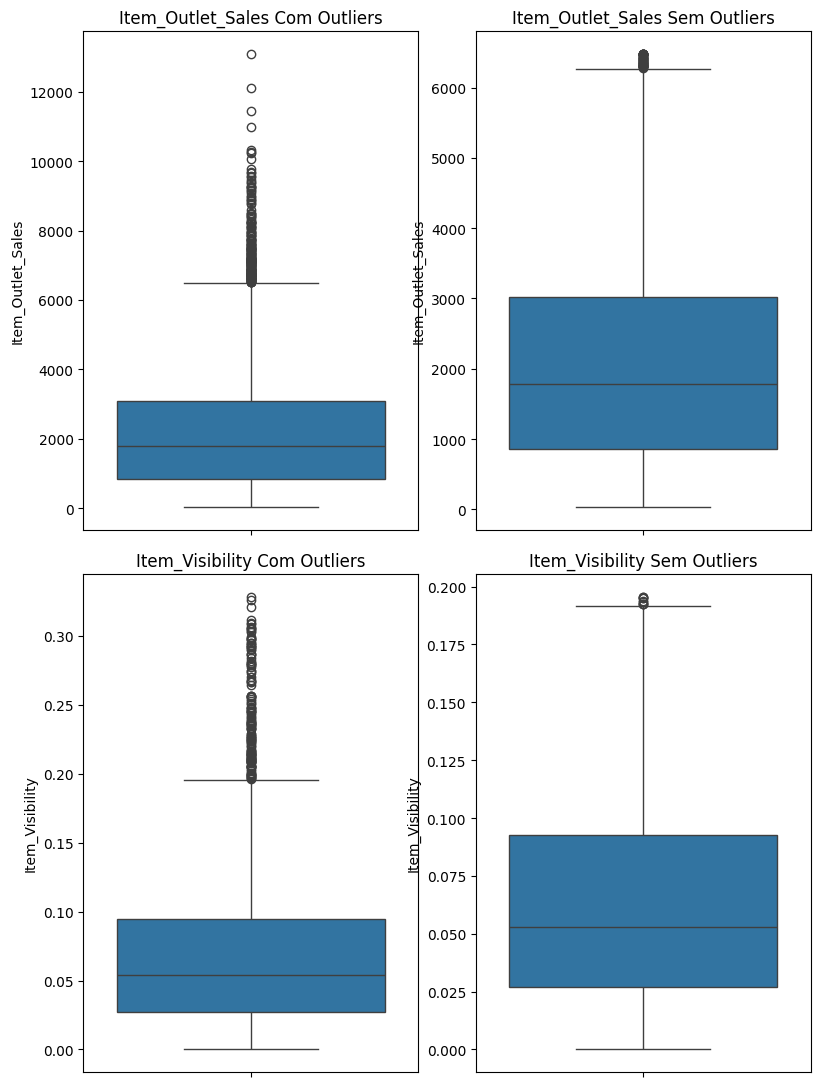

In [47]:
#Exibindo Boxplot com e sem outliers para os atributos analisados

_, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,11));
plt.tight_layout()

sns.boxplot(data=df_train, y='Item_Outlet_Sales', ax = ax[0][0])
ax[0][0].set_title('Item_Outlet_Sales Com Outliers')

sns.boxplot(data=df_train[~outliers], y='Item_Outlet_Sales', ax = ax[0][1])
ax[0][1].set_title('Item_Outlet_Sales Sem Outliers')

sns.boxplot(data=df_train, y='Item_Visibility', ax = ax[1][0])
ax[1][0].set_title('Item_Visibility Com Outliers')

sns.boxplot(data=df_train[~outliers], y='Item_Visibility', ax = ax[1][1])
ax[1][1].set_title('Item_Visibility Sem Outliers')

In [48]:
#Removendo Outliers do dataset
df_train_sem_outliers = df_train[~outliers].reset_index(drop = True)
df_train_sem_outliers.shape

(8193, 12)

In [49]:
df_train_sem_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8193 entries, 0 to 8192
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8193 non-null   object 
 1   Item_Weight                8193 non-null   float64
 2   Item_Fat_Content           8193 non-null   object 
 3   Item_Visibility            8193 non-null   float64
 4   Item_Type                  8193 non-null   object 
 5   Item_MRP                   8193 non-null   float64
 6   Outlet_Identifier          8193 non-null   object 
 7   Outlet_Establishment_Year  8193 non-null   int64  
 8   Outlet_Size                8193 non-null   object 
 9   Outlet_Location_Type       8193 non-null   object 
 10  Outlet_Type                8193 non-null   object 
 11  Item_Outlet_Sales          8193 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 768.2+ KB


#Engenharia de Atributos

In [50]:
#Calculando idade da loja
df_train_sem_outliers['Outlet_Age'] = datetime.datetime.now().year-df_train_sem_outliers['Outlet_Establishment_Year']

#Calculando idade da loja
df_test['Outlet_Age'] = datetime.datetime.now().year-df_test['Outlet_Establishment_Year']

In [51]:
#Retirando coluna Outlet_Establishment_Year
df_train_sem_outliers = df_train_sem_outliers.drop(columns = 'Outlet_Establishment_Year')
df_test = df_test.drop(columns = 'Outlet_Establishment_Year')

In [52]:
df_train_sem_outliers['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [53]:
#Reduzindo variedade de Item_Type
bakery = ['Baking Goods','Breads']
drinks = ['Soft Drinks','Hard Drinks']
fast_food = ['Snack Foods', 'Frozen Foods', 'Canned']
meals = ['Breakfast', 'Seafood','Meat', 'Fruits and Vegetables']

In [54]:
#Alimentando dataframe com as macrocategorias
df_train_sem_outliers['MacroCategory'] = df_train_sem_outliers['Item_Type']
df_train_sem_outliers['MacroCategory'] = df_train_sem_outliers['MacroCategory'].replace(bakery, 'bakery')
df_train_sem_outliers['MacroCategory'] = df_train_sem_outliers['MacroCategory'].replace(drinks, 'drinks')
df_train_sem_outliers['MacroCategory'] = df_train_sem_outliers['MacroCategory'].replace(fast_food, 'fast_food')
df_train_sem_outliers['MacroCategory'] = df_train_sem_outliers['MacroCategory'].replace(meals, 'meals')

df_train_sem_outliers = df_train_sem_outliers.drop(columns = 'Item_Type')

df_test['MacroCategory'] = df_test['Item_Type']
df_test['MacroCategory'] = df_test['MacroCategory'].replace(bakery, 'bakery')
df_test['MacroCategory'] = df_test['MacroCategory'].replace(drinks, 'drinks')
df_test['MacroCategory'] = df_test['MacroCategory'].replace(fast_food, 'fast_food')
df_test['MacroCategory'] = df_test['MacroCategory'].replace(meals, 'meals')

df_test = df_test.drop(columns = 'Item_Type')


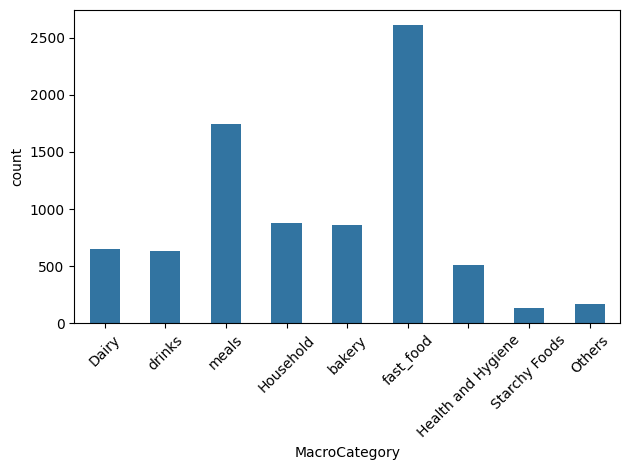

In [55]:
sns.countplot(data=df_train_sem_outliers, x='MacroCategory', width = 0.5, dodge=True);
plt.xticks(rotation=45)
plt.tight_layout()

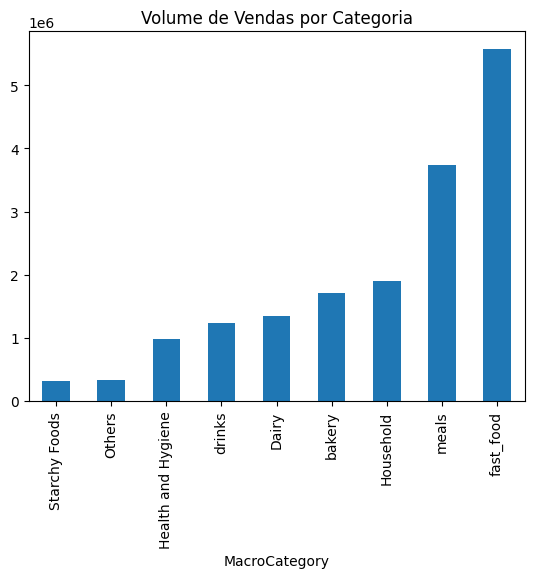

In [56]:
df_train_sem_outliers.groupby('MacroCategory')['Item_Outlet_Sales'].sum().sort_values().plot(kind = 'bar', title = 'Volume de Vendas por Categoria');

**Observação**:

* Trabalhando com idade ao invés do ano de abertura da loja, passamos a ter um variável numérica e não mais uma categórica. Isso ajuda a reduzir dimensionalidade do dataset, pois não vamos ter que realizar o encoding do atributo categórico "Outlet_Establishment_Year"

* Foi possível reduzir de 16 para 9 diferentes tipos de categoria de itens. Isso também ajuda na redução de dimensionalidade do dataframe

* fast_food e meals são as macrocategorias de itens mais vendidos em valor unitário e também são as com maior quantidade de ocorrências no dataframe

# Encoding

In [57]:
#Ajustando atributo categórico ordinal
df_train_sem_outliers['Outlet_Size'] = df_train_sem_outliers['Outlet_Size'].map({'Small'  : 1,
                                                 'Medium' : 2,
                                                 'High'   : 3
                                                 }).astype(int)

df_test['Outlet_Size'] = df_test['Outlet_Size'].map({'Small'  : 1,
                                                 'Medium' : 2,
                                                 'High'   : 3
                                                 }).astype(int)

In [58]:
#Definindo variáveis categóricas que serão trabalhadas
lista_var_categoricas = ['Outlet_Type','Outlet_Location_Type','Outlet_Identifier','Item_Fat_Content','MacroCategory']
df_train_dummies = df_train_sem_outliers.copy()
#Criando variaveis numéricas para cada variável categórica
for categoria in lista_var_categoricas:
  df_train_dummies = pd.concat([df_train_dummies.drop(categoria,axis = 1),pd.get_dummies(df_train_dummies[categoria])],axis = 1)
df_train_dummies = df_train_dummies.replace(True,1)
df_train_dummies = df_train_dummies.replace(False,0)

#Definindo variáveis categóricas que serão trabalhadas
lista_var_categoricas = ['Outlet_Type','Outlet_Location_Type','Outlet_Identifier','Item_Fat_Content','MacroCategory']
df_test_dummies = df_test.copy()
#Criando variaveis numéricas para cada variável categórica
for categoria in lista_var_categoricas:
  df_test_dummies = pd.concat([df_test_dummies.drop(categoria,axis = 1),pd.get_dummies(df_test_dummies[categoria])],axis = 1)
df_test_dummies = df_test_dummies.replace(True,1)
df_test_dummies = df_test_dummies.replace(False,0)

In [59]:
#Exibindo atributos que possuem correlação com variável alvo
corr_matrix = df_train_dummies.corr(numeric_only=True)
corr_matrix[((corr_matrix["Item_Outlet_Sales"]>0.1) | (corr_matrix["Item_Outlet_Sales"]<-0.1))]["Item_Outlet_Sales"]

Item_MRP             0.564361
Item_Outlet_Sales    1.000000
Grocery Store       -0.419382
Supermarket Type1    0.145584
Supermarket Type3    0.243029
OUT010              -0.293040
OUT019              -0.281662
OUT027               0.243029
Name: Item_Outlet_Sales, dtype: float64

In [60]:
#Exibindo atributos com correlação insignificante com a variável alvo
corr_matrix = df_train_dummies.corr(numeric_only=True)
corr_matrix[~((corr_matrix["Item_Outlet_Sales"]>0.1) | (corr_matrix["Item_Outlet_Sales"]<-0.1))]["Item_Outlet_Sales"]

Item_Weight           0.010325
Item_Visibility      -0.071907
Outlet_Size           0.073304
Outlet_Age            0.009663
Supermarket Type2    -0.025973
Tier 1               -0.087753
Tier 2                0.072139
Tier 3                0.010974
OUT013                0.030162
OUT017                0.033737
OUT018               -0.025973
OUT035                0.063035
OUT045                0.011426
OUT046                0.030855
OUT049                0.047905
Low Fat              -0.026938
Regular               0.026938
Dairy                -0.002856
Health and Hygiene   -0.027635
Household             0.017134
Others               -0.013631
Starchy Foods         0.018546
bakery               -0.026499
drinks               -0.028248
fast_food             0.021364
meals                 0.018078
Name: Item_Outlet_Sales, dtype: float64

In [61]:
df_train_dummies.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Outlet_Age,Grocery Store,Supermarket Type1,Supermarket Type2,...,Regular,Dairy,Health and Hygiene,Household,Others,Starchy Foods,bakery,drinks,fast_food,meals
0,FDA15,9.30,0.016047,249.8092,2,3735.1380,25,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,DRC01,5.92,0.019278,48.2692,2,443.4228,15,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,FDN15,17.50,0.016760,141.6180,2,2097.2700,25,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,182.0950,2,732.3800,26,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,NCD19,8.93,0.000000,53.8614,3,994.7052,37,0,1,0,...,0,0,0,1,0,0,0,0,0,0


#Modelagem

##Pré-processamento

In [62]:
#Eliminando coluna com código de identificação do item
df_train_final = df_train_dummies.drop(columns = 'Item_Identifier')

In [63]:
y = df_train_final['Item_Outlet_Sales']
X = df_train_final.drop(columns = 'Item_Outlet_Sales')

In [64]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Age,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Tier 1,...,Regular,Dairy,Health and Hygiene,Household,Others,Starchy Foods,bakery,drinks,fast_food,meals
0,9.30,0.016047,249.8092,2,25,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,5.92,0.019278,48.2692,2,15,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,17.50,0.016760,141.6180,2,25,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.000000,182.0950,2,26,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,8.93,0.000000,53.8614,3,37,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [65]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [66]:
#Dividindo entre base de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
print('Treinamento: ',X_train.shape,y_train.shape)
print('Teste: ',X_test.shape,y_test.shape)

Treinamento:  (6554, 33) (6554,)
Teste:  (1639, 33) (1639,)


In [68]:
scaler = StandardScaler()
scaler = scaler.fit(X_test)

In [69]:
#Padronizando dados
X_test_scaled = scaler.transform(X_test)
X_train_scaled = scaler.transform(X_train)

print('Treinamento: ',X_train_scaled.shape)
print('Teste: ',X_test_scaled.shape)

Treinamento:  (6554, 33)
Teste:  (1639, 33)


##V1 - Linear Regression (Benchmark)

In [70]:
#Chamando Modelo
model_v1 = LinearRegression()

#Treinando o Modelo
model_v1.fit(X_train_scaled,y_train)

LinearRegression()

In [71]:
# Previsões com dados de treino
y_pred_train_v1 = model_v1.predict(X_train_scaled)

In [72]:
#Avaliação do modelo
y_pred_test_v1 = model_v1.predict(X_test_scaled)

In [73]:
#Calculando métricas
rmse_train_v1 = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_v1))
r2_train_v1 = metrics.r2_score(y_train, y_pred_train_v1)
rmse_test_v1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v1))
r2_test_v1 = metrics.r2_score(y_test, y_pred_test_v1)

In [74]:
# Print das métricas em treino
print('Métricas Treino')
print('Root Mean Squared Error:', rmse_train_v1)
print('R2 Score:', r2_train_v1)
print('--'*25)
print('Métricas Teste')
print('Root Mean Squared Error:', rmse_test_v1)
print('R2 Score:', r2_test_v1)

Métricas Treino
Root Mean Squared Error: 1000.174070886445
R2 Score: 0.5522795442021411
--------------------------------------------------
Métricas Teste
Root Mean Squared Error: 1031.719299687496
R2 Score: 0.5433365524655975


##V2 - Ridge (L2)

In [75]:
model_v2 = Ridge(alpha = 5.0)
model_v2 = model_v2.fit(X_train_scaled, y_train)

In [76]:
y_pred_train_v2 = model_v2.predict(X_train_scaled)

In [77]:
#Avaliação do modelo
y_pred_test_v2 = model_v2.predict(X_test_scaled)

In [78]:
#Calculando métricas
rmse_train_v2 = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_v2))
r2_train_v2 = metrics.r2_score(y_train, y_pred_train_v2)
rmse_test_v2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v2))
r2_test_v2 = metrics.r2_score(y_test, y_pred_test_v2)

In [79]:
# Print das métricas em treino
print('Métricas Treino')
print('Root Mean Squared Error:', rmse_train_v2)
print('R2 Score:', r2_train_v2)
print('--'*25)
print('Métricas Teste')
print('Root Mean Squared Error:', rmse_test_v2)
print('R2 Score:', r2_test_v2)

Métricas Treino
Root Mean Squared Error: 1000.1743233055519
R2 Score: 0.552279318215055
--------------------------------------------------
Métricas Teste
Root Mean Squared Error: 1031.7300426213787
R2 Score: 0.5433270422610937


##V3 - Random Forest

In [80]:
model_v3 = RandomForestRegressor()

In [81]:
model_v3.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [82]:
y_pred_train_v3 = model_v3.predict(X_train_scaled)

In [83]:
y_pred_test_v3 = model_v3.predict(X_test_scaled)

In [84]:
#Calculando métricas
rmse_train_v3 = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_v3))
r2_train_v3 = metrics.r2_score(y_train, y_pred_train_v3)
rmse_test_v3 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v3))
r2_test_v3 = metrics.r2_score(y_test, y_pred_test_v3)

In [85]:
# Print das métricas em treino
print('Métricas Treino')
print('Root Mean Squared Error:', rmse_train_v3)
print('R2 Score:', r2_train_v3)
print('--'*25)
print('Métricas Teste')
print('Root Mean Squared Error:', rmse_test_v3)
print('R2 Score:', r2_test_v3)

Métricas Treino
Root Mean Squared Error: 382.7490746064961
R2 Score: 0.9344331902360775
--------------------------------------------------
Métricas Teste
Root Mean Squared Error: 1046.506455675743
R2 Score: 0.5301524515504668


In [86]:
#Definindo variáveis com maior importância
# Identificando a importância das variáveis
importancias = model_v3.feature_importances_
variaveis = X.columns
# Dataframe das variáveis mais relevantes
importancias_df = pd.DataFrame({'Variável': variaveis,
                                'Importância': importancias}).sort_values(by = 'Importância',
                                                                          ascending = False)

In [87]:
importancias_df.head(10)

,Variável,Importância
2,Item_MRP,0.450159
5,Grocery Store,0.203568
1,Item_Visibility,0.104665
0,Item_Weight,0.067540
4,Outlet_Age,0.030798
17,OUT027,0.017156
8,Supermarket Type3,0.015345
31,fast_food,0.009306
32,meals,0.007979
3,Outlet_Size,0.007210


**Observção**: A diferença de 0.4 entre os valores da métrica R2 Score para treino e teste indicam que estamos diante de um caso de overfitting. Seguiremos com a otimização de hiperparâmetros através do método GridSearchCV para lidar com o mesmo

De todas as 27 variáveis preditoras consideradas para o modelo, apenas 5 são responsáveis por explicar 85% da variável alvo. São elas: Item_MRP, Grocery Store, Item_Visibility, Item_Weight e Outlet_Age.

Dado que os demais atributos possuem relevância muito baixa, pode ser que os mesmos estejam causando ruído no modelo e, portanto, prejudicando a performance final.

Sendo assim, vamos experimentar treinar o modelo apenas com essas 5 variáveis mais a frente.

##V4 - Random Forest (Otimização de Hiperparametros)

In [88]:
#Importando GridSearchCV
from sklearn.model_selection import GridSearchCV

In [89]:
# Definição do espaço de hiperparâmetros para otimização
parametros = {'n_estimators': [30, 50, 70, 90, 95, 100],
              'max_depth': [2,3,5,7,10]}

In [90]:
# Configuração do GridSearchCV
grid_search = GridSearchCV(estimator = model_v3,
                               param_grid = parametros,
                               cv = 5,
                               scoring = 'neg_mean_squared_error',
                               verbose = 1)

In [91]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 5, 7, 10],
                         'n_estimators': [30, 50, 70, 90, 95, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [92]:
#Melhor Modelo definido pelo Grid
print(f'Melhores parametros {grid_search.best_params_}')
model_v4 = grid_search.best_estimator_

Melhores parametros {'max_depth': 5, 'n_estimators': 95}


In [93]:
y_pred_train_v4 = model_v4.predict(X_train_scaled)
y_pred_test_v4 = model_v4.predict(X_test_scaled)

In [94]:
#Calculando métricas
rmse_train_v4 = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_v4))
r2_train_v4 = metrics.r2_score(y_train, y_pred_train_v4)
rmse_test_v4 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v4))
r2_test_v4 = metrics.r2_score(y_test, y_pred_test_v4)

In [95]:
# Print das métricas em treino
print('Métricas Treino')
print('Root Mean Squared Error:', rmse_train_v4)
print('R2 Score:', r2_train_v4)
print('--'*25)
print('Métricas Teste')
print('Root Mean Squared Error:', rmse_test_v4)
print('R2 Score:', r2_test_v4)

Métricas Treino
Root Mean Squared Error: 955.0567045174387
R2 Score: 0.5917613964971751
--------------------------------------------------
Métricas Teste
Root Mean Squared Error: 997.5646330659252
R2 Score: 0.5730714200633542


##V5 - XGBoost

In [96]:
xgbc = XGBRegressor()

In [97]:
modelo_v5 = xgbc.fit(X_train_scaled, y_train)

In [98]:
y_pred_train_v5 = modelo_v5.predict(X_train_scaled)
y_pred_test_v5 = modelo_v5.predict(X_test_scaled)

In [99]:
#Calculando métricas
rmse_train_v5 = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_v5))
r2_train_v5 = metrics.r2_score(y_train, y_pred_train_v5)
rmse_test_v5 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v5))
r2_test_v5 = metrics.r2_score(y_test, y_pred_test_v5)

In [100]:
# Print das métricas em treino
print('Métricas Treino')
print('Root Mean Squared Error:', rmse_train_v5)
print('R2 Score:', r2_train_v5)
print('--'*25)
print('Métricas Teste')
print('Root Mean Squared Error:', rmse_test_v5)
print('R2 Score:', r2_test_v5)

Métricas Treino
Root Mean Squared Error: 562.72158714347
R2 Score: 0.8582761615979556
--------------------------------------------------
Métricas Teste
Root Mean Squared Error: 1091.919308188134
R2 Score: 0.48848987718343406


**Obersavação:** O modelo XGBoost está apresentando overfitting assim como o RadomForest.

##V6 - XGBoost (Otimização de Hiperparametros)

In [101]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5]
}

In [102]:
# Configuração do GridSearchCV
grid_search_xgb = GridSearchCV(estimator = modelo_v5,
                               param_grid = param_grid,
                               cv = 5,
                               scoring = 'r2',
                               )

In [103]:
grid_search_xgb.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [104]:
#Melhor Modelo definido pelo Grid
print(f'Melhores parametros {grid_search_xgb.best_params_}')
model_v6 = grid_search_xgb.best_estimator_

Melhores parametros {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100}


In [105]:
y_pred_train_v6 = model_v6.predict(X_train_scaled)
y_pred_test_v6 = model_v6.predict(X_test_scaled)

In [106]:
#Calculando métricas
rmse_train_v6 = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_v6))
r2_train_v6 = metrics.r2_score(y_train, y_pred_train_v6)
rmse_test_v6 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v6))
r2_test_v6 = metrics.r2_score(y_test, y_pred_test_v6)

In [107]:
# Print das métricas em treino
print('Métricas Treino')
print('Root Mean Squared Error:', rmse_train_v6)
print('R2 Score:', r2_train_v6)
print('--'*25)
print('Métricas Teste')
print('Root Mean Squared Error:', rmse_test_v6)
print('R2 Score:', r2_test_v6)

Métricas Treino
Root Mean Squared Error: 946.9001287169249
R2 Score: 0.5987046702223946
--------------------------------------------------
Métricas Teste
Root Mean Squared Error: 993.806474147036
R2 Score: 0.5762821256535624


##V7 - RandomForest para as top 5 variáveis e Otimização de hiperparâmetros

In [108]:
#Deixando apenas as top 3 variáveis no dataset
top_variaveis = ['Item_MRP', 'Grocery Store' ,'Outlet_Age','Item_Visibility','Item_Weight']
X_top = X[top_variaveis]

#Dividindo entre base de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

print('Treinamento: ',X_train.shape,y_train.shape)
print('Teste: ',X_test.shape,y_test.shape)

scaler = StandardScaler()
scaler = scaler.fit(X_test)

#Padronizando dados
X_test_scaled = scaler.transform(X_test)
X_train_scaled = scaler.transform(X_train)

print('Treinamento: ',X_train_scaled.shape)
print('Teste: ',X_test_scaled.shape)

Treinamento:  (6554, 5) (6554,)
Teste:  (1639, 5) (1639,)
Treinamento:  (6554, 5)
Teste:  (1639, 5)


In [109]:
model_v7 = RandomForestRegressor()
model_v7.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [110]:
# Definição do espaço de hiperparâmetros para otimização
parametros = {'n_estimators': [30, 50, 70, 90, 95, 100],
              'max_depth': [2,3,5,7,10]}

              # Configuração do GridSearchCV
grid_search = GridSearchCV(estimator = model_v7,
                               param_grid = parametros,
                               cv = 5,
                               scoring = 'neg_mean_squared_error',
                               verbose = 1)

In [111]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 5, 7, 10],
                         'n_estimators': [30, 50, 70, 90, 95, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [112]:
#Melhor Modelo definido pelo Grid
print(f'Melhores parametros {grid_search.best_params_}')
model_v7 = grid_search.best_estimator_

Melhores parametros {'max_depth': 5, 'n_estimators': 70}


In [113]:
y_pred_train_v7 = model_v7.predict(X_train_scaled)
y_pred_test_v7 = model_v7.predict(X_test_scaled)

#Calculando métricas
rmse_train_v7 = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_v7))
r2_train_v7 = metrics.r2_score(y_train, y_pred_train_v7)
rmse_test_v7 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v7))
r2_test_v7 = metrics.r2_score(y_test, y_pred_test_v7)

# Print das métricas em treino
print('Métricas Treino')
print('Root Mean Squared Error:', rmse_train_v7)
print('R2 Score:', r2_train_v7)
print('--'*25)
print('Métricas Teste')
print('Root Mean Squared Error:', rmse_test_v7)
print('R2 Score:', r2_test_v7)

Métricas Treino
Root Mean Squared Error: 955.1355055223052
R2 Score: 0.5916940268024242
--------------------------------------------------
Métricas Teste
Root Mean Squared Error: 997.4737847563187
R2 Score: 0.5731491773783468


#Seleção do modelo

In [114]:
#Compilando dados em um dataframe
# Preparando o novo dataset
resumo_resultado = pd.DataFrame({'modelo': ['LinearRegression','Ridge (L2)', 'RandomForest', 'RandomForestHyperParam', 'XGBoost', 'XGBoostHyperParam','RandomForestHyperParam_top_features'],
                              'RMSE': [rmse_test_v1,rmse_test_v2,rmse_test_v3,rmse_test_v4,rmse_test_v5,rmse_test_v6,rmse_test_v7],
                              'R2 Score': [ r2_test_v1,r2_test_v2,r2_test_v3,r2_test_v4,r2_test_v5,r2_test_v6,r2_test_v7],
                              })
resumo_resultado.sort_values(by = 'RMSE')

,modelo,RMSE,R2 Score
5,XGBoostHyperParam,993.806474,0.576282
6,RandomForestHyperParam_top_features,997.473785,0.573149
3,RandomForestHyperParam,997.564633,0.573071
0,LinearRegression,1031.719300,0.543337
1,Ridge (L2),1031.730043,0.543327
2,RandomForest,1046.506456,0.530152
4,XGBoost,1091.919308,0.488490


O modelo que apresentou melhor performance em RMSE e R2 foi o XGBoost com ajuste de hiperparâmetros. No entanto, com diferença insignificante quando comparado ao RandomForest com ajuste de hiperparâmetros e considerando apenas as top 5 variáveis que explicam a variável alvo.
Como o modelo com apenas 5 variáveis é consideravelmente mais simples, o mesmo será o escolhido

#Testando o Modelo Escolhido

In [115]:
df_test_dummies.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Age,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,...,Regular,Dairy,Health and Hygiene,Household,Others,Starchy Foods,bakery,drinks,fast_food,meals
0,FDW58,20.750,0.007565,107.8622,2,25,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,FDW14,8.300,0.038428,87.3198,2,17,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
2,NCN55,14.600,0.099575,241.7538,2,26,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,FDQ58,7.315,0.015388,155.0340,2,17,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,FDY38,12.600,0.118599,234.2300,2,39,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0


In [120]:
X_test_final = df_test_dummies[top_variaveis]

In [121]:
X_test_final

,Item_MRP,Grocery Store,Outlet_Age,Item_Visibility,Item_Weight
0,107.8622,0,25,0.007565,20.750
1,87.3198,0,17,0.038428,8.300
2,241.7538,1,26,0.099575,14.600
3,155.0340,0,17,0.015388,7.315
4,234.2300,0,39,0.118599,12.600
...,...,...,...,...,...
5676,141.3154,0,27,0.013496,10.500
5677,169.1448,0,15,0.142991,7.600
5678,118.7440,0,22,0.073529,10.000
5679,214.6218,0,17,0.000000,15.300


In [125]:
scaler = StandardScaler()
scaler = scaler.fit(X_test_final)

In [126]:
#Padronizando dados
X_test_final_scaled = scaler.transform(X_test_final)

In [128]:
#Realizando previsoes
previsoes = model_v7.predict(X_test_final_scaled)

In [136]:
df_test_com_previsoes = df_test.copy()
#Alimentando datasetcom as pevisoes
df_test_com_previsoes['Previsao_Vendas'] = previsoes

In [137]:
df_test_com_previsoes

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,MacroCategory,Previsao_Vendas
0,FDW58,20.750,Low Fat,0.007565,107.8622,OUT049,2,Tier 1,Supermarket Type1,25,fast_food,1593.549747
1,FDW14,8.300,Regular,0.038428,87.3198,OUT017,2,Tier 2,Supermarket Type1,17,Dairy,1430.394332
2,NCN55,14.600,Low Fat,0.099575,241.7538,OUT010,2,Tier 3,Grocery Store,26,Others,549.171083
3,FDQ58,7.315,Low Fat,0.015388,155.0340,OUT017,2,Tier 2,Supermarket Type1,17,fast_food,2517.308935
4,FDY38,12.600,Regular,0.118599,234.2300,OUT027,2,Tier 3,Supermarket Type3,39,Dairy,4513.799239
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,141.3154,OUT046,1,Tier 1,Supermarket Type1,27,fast_food,2094.693188
5677,FDD47,7.600,Regular,0.142991,169.1448,OUT018,2,Tier 3,Supermarket Type2,15,Starchy Foods,2676.690704
5678,NCO17,10.000,Low Fat,0.073529,118.7440,OUT045,2,Tier 2,Supermarket Type1,22,Health and Hygiene,1908.367062
5679,FDJ26,15.300,Regular,0.000000,214.6218,OUT017,2,Tier 2,Supermarket Type1,17,fast_food,3523.460198


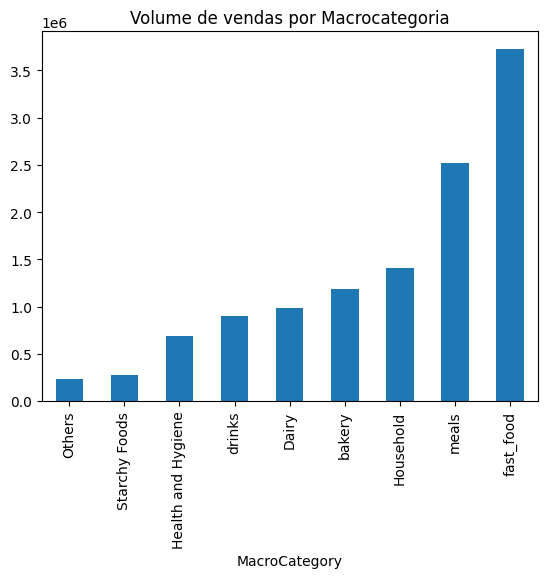

In [151]:
df_test_com_previsoes.groupby('MacroCategory')['Previsao_Vendas'].sum().sort_values().plot(kind = 'bar',title = 'Volume de vendas por Macrocategoria');

**Observação:** O maior volume de vendas continuará vindo dos itens na macrocategoria fast_food seguido dos itens na categoria meals.

#Conclusão

* Após avaliar diferentes modelos, o XGBoost teve um desempenho ligeiramente melhor, mas o RandomForest com apenas as top 5 variáveis foi próximo em desempenho e é preferível devido à sua simplicidade e eficiência computacional. Portanto, escolhemos o RandomForest com as variáveis: Item_MRP, Grocery Store, Item_Visibility, Item_Weight e Outlet_Age, com 'max_depth': 5 e 'n_estimators': 70.

* A performance do melhor modelo ficou em 0.57, indicando que embora seja um bom valor inicial, o mesmo ainda apresenta margem para melhorias.
Algumas sugestões:
  * Coletar dados para um período maior de tempo
  * Envolver especialistas da área de negócio